In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px

In [2]:
collisions = pd.read_csv('Los_Angeles_Collisions_2013through2018.csv',sep=',', 
                         dtype={"case_id": 'Int64', 'location_type': str, 'ramp_intersection': str, 'side_of_hwy': str,
                               'pcf_viol_category': str, 'not_private_property': str})

In [3]:
collisions.head()

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,...,month_,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id
0,-118.323902,34.047565,2001,5814841,2013,2013-03-04T00:00:00.000Z,1942,2013-01-22T00:00:00.000Z,840,36027.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.323902,34.047565,"PICO BLVD & NORTON AVE, LOS ANGELES, CA",PICO BLVD,NORTON AVE,99970.0
1,-118.246332,34.062645,2002,6392368,2014,2014-06-06T00:00:00.000Z,1942,2014-01-25T00:00:00.000Z,730,39341.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.246332,34.062645,"SUNSET BLVD & FIGUEROA ST, LOS ANGELES, CA",SUNSET BLVD,FIGUEROA ST,135877.0
2,-118.361432,34.062946,2003,6718345,2015,2015-03-16T00:00:00.000Z,1942,2015-01-17T00:00:00.000Z,715,40024.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.361432,34.062946,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",WILSHIRE BLVD,FAIRFAX AVE,130218.0
3,-118.453707,34.032356,2004,5968457,2013,2014-06-09T00:00:00.000Z,1942,2013-01-03T00:00:00.000Z,745,38310.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.453707,34.032356,"BUNDY DR & OLYMPIC BLVD, LOS ANGELES, CA",BUNDY DR,OLYMPIC BLVD,135334.0
4,-118.413943,34.221642,2005,6344888,2014,2014-06-05T00:00:00.000Z,1942,2014-01-10T00:00:00.000Z,745,39085.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.413943,34.221642,"ROSCOE BLVD & COLDWATER CANYON AVE, LOS ANGELE...",ROSCOE BLVD,COLDWATER CANYON AVE,150465.0


In [4]:
for col in collisions.columns:
    print(col)

X
Y
OBJECTID
case_id
accident_year
proc_date
juris
collision_date
collision_time
officer_id
reporting_district
day_of_week
chp_shift
population
cnty_city_loc
special_cond
beat_type
chp_beat_type
city_division_lapd
chp_beat_class
beat_number
primary_rd
secondary_rd
distance
direction
intersection
weather_1
weather_2
state_hwy_ind
caltrans_county
caltrans_district
state_route
route_suffix
postmile_prefix
postmile
location_type
ramp_intersection
side_of_hwy
tow_away
collision_severity
number_killed
number_injured
party_count
primary_coll_factor
pcf_code_of_viol
pcf_viol_category
pcf_violation
pcf_viol_subsection
hit_and_run
type_of_collision
mviw
ped_action
road_surface
road_cond_1
road_cond_2
lighting
control_device
chp_road_type
pedestrian_accident
bicycle_accident
motorcycle_accident
truck_accident
not_private_property
alcohol_involved
stwd_vehtype_at_fault
chp_vehtype_at_fault
count_severe_inj
count_visible_inj
count_complaint_pain
count_ped_killed
count_ped_injured
count_bicyclist_ki

In [5]:
# address_group = collisions.groupby('match_addr')

In [12]:
# collisions['match_addr'].value_counts()

In [7]:
#test = collisions[collisions['match_addr'] == 'MANCHESTER AVE & FIGUEROA ST, LOS ANGELES, CA']

In [8]:
#test['pedestrian_accident'].value_counts()

Y    8
Name: pedestrian_accident, dtype: int64

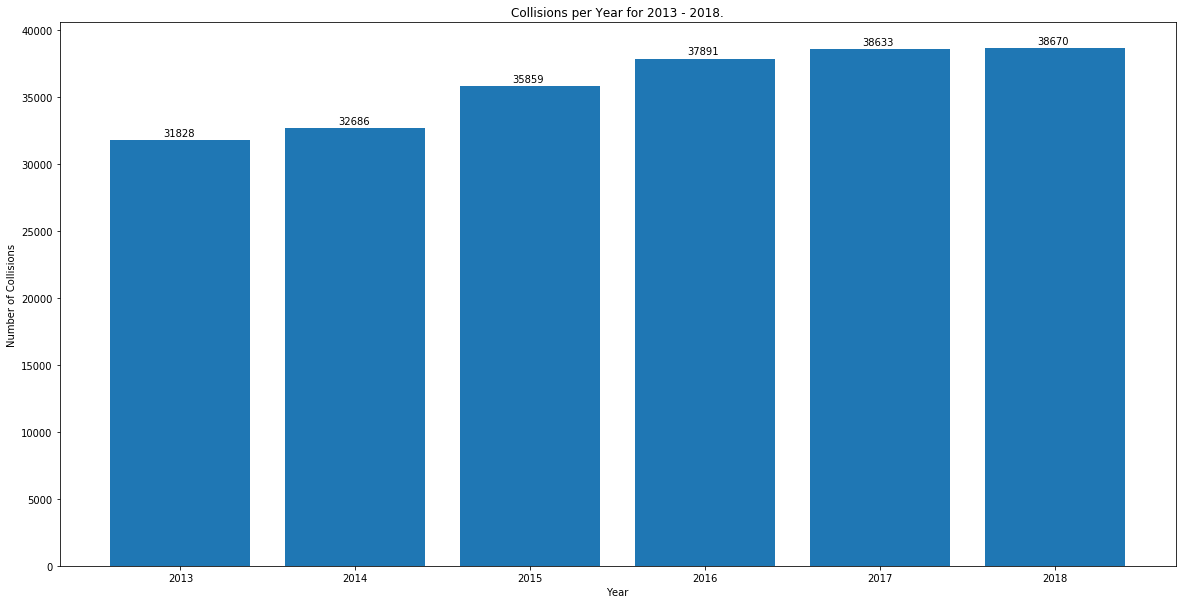

In [215]:
# Collisions grouped by the year they occurred
year_counts = collisions['accident_year'].value_counts()
fig1 = plt.figure(figsize=(20, 10))
ax1 = fig1.add_subplot()
plt.bar(year_counts.index, year_counts)
for i, v in year_counts.items():
    ax1.text(i - .1, v + 300, str(v))
    
plt.title('Collisions per Year for 2013 - 2018.')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.show()

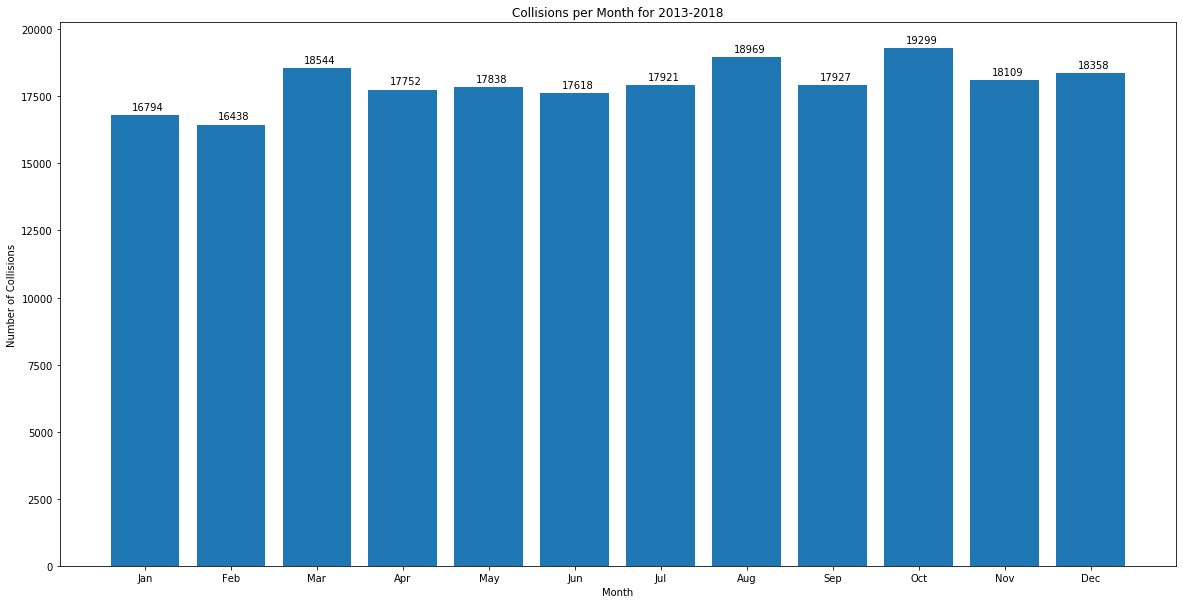

In [216]:
# Collisions grouped by month for the years 2013-2018
month_counts = collisions['month_'].value_counts()
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(month_counts.index, month_counts)

ax.set_xticks(list(range(1, 13)))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, v in month_counts.items():
    ax.text(i - .15, v + 200, str(v))
plt.title('Collisions per Month for 2013-2018')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.show()

In [245]:
fig = px.bar(x=year_counts.index, y=year_counts)
fig.update_layout(
    title = {
        'text': 'Collisions per Year for 2013 - 2018.',
        'y': .95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    ,
    xaxis_title = 'Year',
    yaxis_title = 'Number of Collisions'
)
fig.show()